## Fibonacci Levels Calculation

- To Calculate the fibonacci Levels first we need to identify swings and highs, lows - pivot points

In [1]:
# importing Libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
from Scripts import *
print(DATA_HOME)

E:\Msc\LabTest\stockAnalysis\datab


In [3]:
apollohosp = pd.read_csv(DATA_HOME+'\\apollohosp\\apollohosp.csv')
apollohosp.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2014-03-04,875.041150,882.256099,866.809343,871.167358,74965,0.0,0
1,2014-03-05,874.411628,883.999227,874.411628,878.818054,161162,0.0,0
2,2014-03-06,879.834958,885.064601,867.874650,870.005188,117509,0.0,0
3,2014-03-07,879.350747,879.350747,857.076444,859.158630,121701,0.0,0
4,2014-03-10,860.950298,861.289231,837.707545,844.874084,141440,0.0,0


In [4]:
idx=apollohosp.index
maxval=apollohosp['High'][0:7].max()
highindices =idx[apollohosp['High']==maxval]
highindices[0],maxval

(2, 885.0646008247049)

In [5]:
def get_swings(datadf,windowsize=12):
    # Find 14 days High
    length = len(datadf)
    datadf['SwingHigh'] = np.nan
    datadf['SwingLow'] = np.nan
    datadf['Trend']=0
    highindiceslist=[]
    highindiceslistsmooth=[]
    for i in range(0,length,windowsize):
        maxvalue= datadf['High'][i:i+windowsize].max()
        idx=datadf.index
        highindex= idx[datadf['High']==maxvalue]
        highindiceslist.append(highindex[0])
    
    for i in range(len(highindiceslist)-1):
        if highindiceslist[i]+1 ==highindiceslist[i+1]:
            pass
        else:
            highindiceslistsmooth.append(highindiceslist[i])
    highindiceslist=highindiceslistsmooth 
    for i in range(0,len(highindiceslist)-1):
        datadf['SwingHigh'][highindiceslist[i]:highindiceslist[i+1]] = datadf['High'][highindiceslist[i]]
        datadf['SwingLow'][highindiceslist[i]:highindiceslist[i+1]+1]= datadf['Low'][highindiceslist[i]:highindiceslist[i+1]+1].min()
        if datadf['High'][highindiceslist[i]] > datadf['High'][highindiceslist[i+1]] :
            # downtrend for current trend
            datadf['Trend'][highindiceslist[i]:highindiceslist[i+1]]=-1
        elif datadf['High'][highindiceslist[i]] < datadf['High'][highindiceslist[i+1]]:
            datadf['Trend'][highindiceslist[i]:highindiceslist[i+1]]=1
    return datadf,highindiceslist

In [6]:
apollohosp_new,indices =get_swings(apollohosp)
apollohosp_new.head(30)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,SwingHigh,SwingLow,Trend
0,2014-03-04,875.041150,882.256099,866.809343,871.167358,74965,0.0,0,NaN,NaN,0
1,2014-03-05,874.411628,883.999227,874.411628,878.818054,161162,0.0,0,NaN,NaN,0
2,2014-03-06,879.834958,885.064601,867.874650,870.005188,117509,0.0,0,885.064601,825.214515,1
3,2014-03-07,879.350747,879.350747,857.076444,859.158630,121701,0.0,0,885.064601,825.214515,1
4,2014-03-10,860.950298,861.289231,837.707545,844.874084,141440,0.0,0,885.064601,825.214515,1
5,2014-03-11,846.810997,858.044970,826.086185,827.974670,132434,0.0,0,885.064601,825.214515,1
6,2014-03-12,828.023038,844.002430,825.214515,836.448547,141798,0.0,0,885.064601,825.214515,1
7,2014-03-13,845.455079,852.234215,827.538791,831.170471,116702,0.0,0,885.064601,825.214515,1
8,2014-03-14,845.455117,845.455117,830.928396,836.690674,221085,0.0,0,885.064601,825.214515,1
9,2014-03-18,836.061096,849.328844,832.477827,846.859314,124700,0.0,0,885.064601,825.214515,1


In [7]:
print(indices)

[2, 16, 35, 39, 48, 65, 83, 96, 119, 127, 132, 144, 166, 172, 180, 193, 215, 219, 237, 252, 264, 276, 294, 311, 323, 334, 340, 352, 366, 375, 390, 396, 410, 427, 440, 449, 468, 489, 502, 504, 519, 539, 548, 554, 574, 577, 596, 600, 615, 629, 642, 650, 666, 680, 696, 717, 730, 733, 744, 760, 780, 801, 804, 816, 834, 842, 852, 865, 885, 888, 911, 923, 931, 939, 949, 963, 979, 984, 1002, 1016, 1024, 1032, 1055, 1068, 1091, 1099, 1106, 1118, 1137, 1148, 1156, 1167, 1181, 1199, 1201, 1214, 1231, 1247, 1258, 1260, 1279, 1291, 1300, 1320, 1340, 1349, 1356, 1378, 1384, 1403, 1413, 1427, 1431, 1448, 1462, 1467, 1476, 1499, 1501, 1512, 1535, 1541, 1549, 1571, 1580, 1584, 1607, 1617, 1624, 1632, 1655, 1665, 1675, 1691, 1703, 1713, 1720, 1732, 1747, 1763, 1765, 1783, 1799, 1810, 1820, 1835, 1846, 1848, 1861, 1876, 1895, 1903, 1908, 1931, 1935, 1952, 1967]


In [8]:
def adjust_swings(datadf,indices):
    datadf['AdjSwingHigh']=np.nan
    datadf['AdjSwingLow']=np.nan
    for i in range(len(indices)-2):
        datadf['AdjSwingHigh'][indices[i+1]:indices[i+2]] = max(datadf['SwingHigh'][indices[i]],datadf['SwingHigh'][indices[i+1]])
        datadf['AdjSwingLow'][indices[i+1]:indices[i+2]] = min(datadf['SwingLow'][indices[i]],datadf['SwingLow'][indices[i+1]])
    return datadf

In [9]:
apollohosp_new =adjust_swings(apollohosp_new,indices)
apollohosp_new[['SwingHigh','SwingLow','AdjSwingHigh','AdjSwingLow']].head(30)

,SwingHigh,SwingLow,AdjSwingHigh,AdjSwingLow
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,885.064601,825.214515,NaN,NaN
3,885.064601,825.214515,NaN,NaN
4,885.064601,825.214515,NaN,NaN
5,885.064601,825.214515,NaN,NaN
6,885.064601,825.214515,NaN,NaN
7,885.064601,825.214515,NaN,NaN
8,885.064601,825.214515,NaN,NaN
9,885.064601,825.214515,NaN,NaN


In [10]:
def get_fibonacciLevels(datadf):
    #levels=['level_0L','level_38L','level_50L','level_61L','level_76L','level_78L','level_100L','level_127L',
    #        'level_0H','level_38H','level_50H','level_61H','level_76H','level_78H','level_100H','level_127H']
    levels=['level_0','level_38','level_50','level_61','level_78','level_100','level_127','level_161','level_261']
    for i in levels:
        datadf[i]=np.nan
    datadf['val']=np.nan
    datadf['diff'] = abs(datadf['AdjSwingHigh']-datadf['AdjSwingLow'])
    length=len(datadf)
    for i in range(length):
        swinghigh=datadf['AdjSwingHigh'][i]
        high=datadf['High'][i]
        low=datadf['Low'][i]
        swinglow=datadf['AdjSwingLow'][i]
        diff=datadf['diff'][i]
        if datadf['Trend'][i]==-1:
            # down
            datadf['level_0'][i] = swinghigh
            datadf['level_38'][i] = swinghigh - (diff*38.2/100)
            datadf['level_50'][i] = swinghigh - (diff*50/100)
            datadf['level_61'][i] = swinghigh - (diff*61.8/100)
            #datadf['level_76'][i] = swinghigh - (diff*76.4/100)
            datadf['level_78'][i] = swinghigh - (diff*78.6/100)
            datadf['level_100'][i] = swinglow
            datadf['level_127'][i] = swinghigh - (diff*127/100)
            datadf['level_161'][i] = swinghigh - (diff*161.8/100)
            datadf['level_261'][i] = swinghigh - (diff*261.8/100)
            datadf['val'][i]=low
            
        elif datadf['Trend'][i]==1:
            datadf['level_0'][i] = swinglow
            datadf['level_38'][i] = swinglow + (diff*38.2/100)
            datadf['level_50'][i] = swinglow + (diff*50/100)
            datadf['level_61'][i] = swinglow + (diff*61.8/100)
            #datadf['level_76'][i] = swinglow + (diff*76.4/100)
            datadf['level_78'][i] = swinglow + (diff*78.6/100)
            datadf['level_100'][i] = swinghigh
            datadf['level_127'][i] = swinglow + (diff*127/100)
            datadf['level_161'][i] = swinglow + (diff*161.8/100)
            datadf['level_261'][i] = swinglow + (diff*261.8/100)
            datadf['val'][i]=high
            
        elif datadf['Trend'][i]==0:
            datadf['val'][i]=datadf['Close'][i]
        
        
    return datadf

In [11]:
apollohosp_fib=get_fibonacciLevels(apollohosp_new)
apollohosp_fib[['SwingHigh','SwingLow','level_0','level_38','level_50','level_61','level_78','level_100','level_127','level_161','level_261']].head(30)

,SwingHigh,SwingLow,level_0,level_38,level_50,level_61,level_78,level_100,level_127,level_161,level_261
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,885.064601,825.214515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,885.064601,825.214515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,885.064601,825.214515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,885.064601,825.214515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,885.064601,825.214515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,885.064601,825.214515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,885.064601,825.214515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,885.064601,825.214515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
indicescp=indices.copy()
indicescp.remove(indicescp[0])
print(len(indicescp))

156


In [13]:

def calculate_fiblevels(datadf,indices):
    datadf=datadf.fillna(0)
    length = len(datadf)
    datadf['FibonacciLevels']=np.nan
    levels=['level_0','level_38','level_50','level_61','level_78','level_100','level_127','level_161','level_261']
    for i in range(length-2):
        
        if  datadf['High'][i] > datadf['level_161'][i] :
            datadf['FibonacciLevels'][i]= datadf['High'][i]
        elif datadf['Low'][i] <datadf['level_161'][i] :
            datadf['FibonacciLevels'][i] = datadf['Low'][i]
        else:
            nearestlevelidx=""
            min_diff=999
            for j,k in enumerate(levels):
                diff =abs(datadf[k][i]-datadf['val'][i])
                if diff <min_diff:
                    min_diff=diff
                    nearestlevelidx=k
            #print(nearestlevelidx,min_diff)
            datadf['FibonacciLevels'][i] = datadf[nearestlevelidx][i]
            
    return datadf

In [14]:
for j,k in enumerate(['level_0','level_38','level_50','level_61','level_78','level_100']):
    print(j,k)

0 level_0
1 level_38
2 level_50
3 level_61
4 level_78
5 level_100


In [15]:
type(apollohosp_fib['level_0'][3])

numpy.float64

In [16]:
apollohosp_fib['High'][20]

878.4307684563028

In [17]:
apollohosp_fib =calculate_fiblevels(apollohosp_fib,indices)
apollohosp_fib[['FibonacciLevels','val']].head(50)

,FibonacciLevels,val
0,882.256099,871.167358
1,883.999227,878.818054
2,885.064601,885.064601
3,879.350747,879.350747
4,861.289231,861.289231
5,858.044970,858.044970
6,844.002430,844.002430
7,852.234215,852.234215
8,845.455117,845.455117
9,849.328844,849.328844


In [18]:
apollohosp_fib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             1972 non-null   object 
 1   Open             1972 non-null   float64
 2   High             1972 non-null   float64
 3   Low              1972 non-null   float64
 4   Close            1972 non-null   float64
 5   Volume           1972 non-null   int64  
 6   Dividends        1972 non-null   float64
 7   Stock Splits     1972 non-null   int64  
 8   SwingHigh        1972 non-null   float64
 9   SwingLow         1972 non-null   float64
 10  Trend            1972 non-null   int64  
 11  AdjSwingHigh     1972 non-null   float64
 12  AdjSwingLow      1972 non-null   float64
 13  level_0          1972 non-null   float64
 14  level_38         1972 non-null   float64
 15  level_50         1972 non-null   float64
 16  level_61         1972 non-null   float64
 17  level_78      

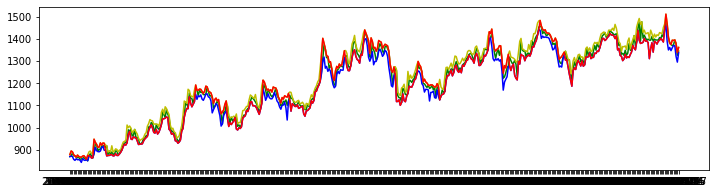

In [19]:
import matplotlib.pyplot as plt

x = apollohosp_fib['Date'][20:500]
y1= apollohosp_fib['Open'][20:500]
#y2= apollohosp_fib['Close'][0:500]
y3= apollohosp_fib['High'][20:500]
y4= apollohosp_fib['Low'][20:500]
y5 = apollohosp_fib['FibonacciLevels'][20:500]

plt.figure(figsize=(12,3))
plt.plot(x,y1,'g')
plt.plot(x,y3,'y')
plt.plot(x,y4,'b')
plt.plot(x,y5,'r')

In [20]:
apollohosp_fib.to_csv(DATA_HOME+'\\apollohosp\\apollohosp_fibonacci.csv')

In [21]:
dabur = pd.read_csv(DATA_HOME+'\\dabur\\dabur.csv')

In [22]:
dabur_new,indices =get_swings(dabur)
dabur_new =adjust_swings(dabur_new,indices)
dabur_fib=get_fibonacciLevels(dabur_new)
dabur_fib =calculate_fiblevels(dabur_fib,indices)
dabur_fib.to_csv(DATA_HOME+'\\dabur\\dabur_fibonacci.csv')

In [23]:
maruti = pd.read_csv(DATA_HOME+'\\maruti\\maruti.csv')
maruti_new,indices =get_swings(maruti)
maruti_new =adjust_swings(maruti_new,indices)
maruti_fib=get_fibonacciLevels(maruti_new)
maruti_fib =calculate_fiblevels(maruti_fib,indices)
maruti_fib.to_csv(DATA_HOME+'\\maruti\\maruti_fibonacci.csv')

In [24]:
tcs = pd.read_csv(DATA_HOME+'\\tcs\\tcs.csv')
tcs_new,indices =get_swings(tcs)
tcs_new =adjust_swings(tcs_new,indices)
tcs_fib=get_fibonacciLevels(tcs_new)
tcs_fib =calculate_fiblevels(tcs_fib,indices)
tcs_fib.to_csv(DATA_HOME+'\\tcs\\tcs_fibonacci.csv')

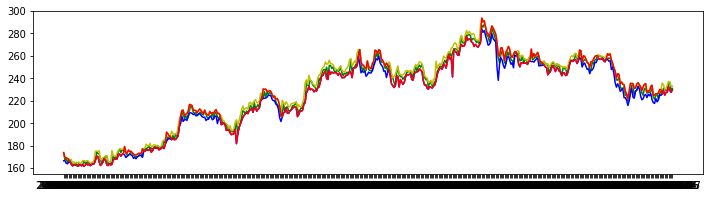

In [25]:
x = dabur_fib['Date'][20:500]
y1= dabur_fib['Open'][20:500]
#y2= apollohosp_fib['Close'][0:500]
y3= dabur_fib['High'][20:500]
y4= dabur_fib['Low'][20:500]
y5 = dabur_fib['FibonacciLevels'][20:500]

plt.figure(figsize=(12,3))
plt.plot(x,y1,'g')
plt.plot(x,y3,'y')
plt.plot(x,y4,'b')
plt.plot(x,y5,'r')

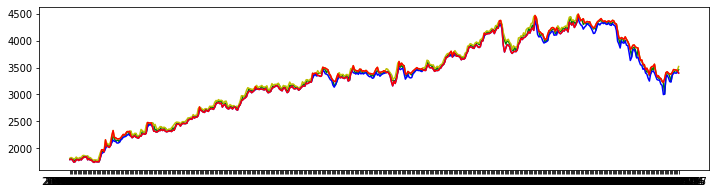

In [26]:
x = maruti_fib['Date'][20:500]
y1= maruti_fib['Open'][20:500]
#y2= apollohosp_fib['Close'][0:500]
y3= maruti_fib['High'][20:500]
y4= maruti_fib['Low'][20:500]
y5 = maruti_fib['FibonacciLevels'][20:500]

plt.figure(figsize=(12,3))
plt.plot(x,y1,'g')
plt.plot(x,y3,'y')
plt.plot(x,y4,'b')
plt.plot(x,y5,'r')

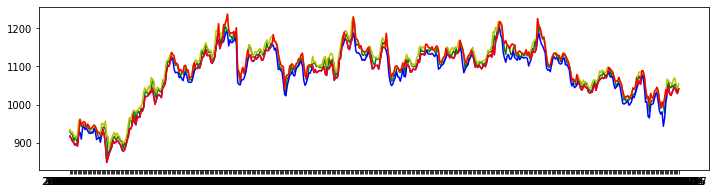

In [27]:
x = tcs_fib['Date'][20:500]
y1= tcs_fib['Open'][20:500]
#y2= apollohosp_fib['Close'][0:500]
y3= tcs_fib['High'][20:500]
y4= tcs_fib['Low'][20:500]
y5 = tcs_fib['FibonacciLevels'][20:500]

plt.figure(figsize=(12,3))
plt.plot(x,y1,'g')
plt.plot(x,y3,'y')
plt.plot(x,y4,'b')
plt.plot(x,y5,'r')